# Project 1 - Default of Credit Card Clients

# PROBLEM STATEMENT
Financial institutions face significant challenges in managing credit risk, particularly in accurately predicting default probabilities among credit card clients. An effective prediction model is essential to mitigate potential losses and to allocate credit more efficiently. This research focuses on improving credit risk management for default prediction among credit card clients in Taiwan by leveraging various data mining methods to enhance the predictive accuracy of default probability.

In [1]:
import pandas as pd
df=pd.read_excel("C://Users//SRIJITA SARKAR//Downloads//default of credit card clients.xls")

In [2]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Finding the missing values

In [3]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

# Cleaning the data 

In [5]:
df.shape

(30000, 25)

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df1=df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']]
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Performing Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cols=['LIMIT_BAL','AGE','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
df1[cols]=ss.fit_transform(df1[cols])

C:\Users\SRIJITA SARKAR\AppData\Local\Temp\ipykernel_3624\4001319896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols]=ss.fit_transform(df1[cols])


In [10]:
df1.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,-1.136720,2,2,1,-1.246020,2,2,-1,-1,-2,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,2,2,2,-1.029047,-1,2,0,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
X=df1[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
Y=df1[['default payment next month']]

In [14]:
X.shape

(30000, 23)

# Dividing the data into training and testing

In [15]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3)

In [20]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
23635,0.867203,2,2,1,1.357652,2,-1,0,0,0,...,36875,0.493583,-0.033019,-0.192916,1.822642,-0.193319,-0.228645,-0.193674,0.676632,-0.293382
14362,0.250611,1,2,2,-0.269643,0,0,0,0,0,...,3416,-0.611625,-0.593186,-0.567624,-0.263453,-0.213588,-0.268403,-0.276146,-0.248683,-0.237130
29340,-1.136720,1,6,2,-0.920561,-1,-1,-1,-1,-1,...,370,-0.672808,-0.650229,-0.652724,-0.275529,-0.031604,-0.296801,-0.256996,-0.314136,-0.293382
28407,-1.136720,2,2,2,-0.812074,1,2,0,0,0,...,16614,-0.424704,-0.445857,-0.551823,-0.341942,-0.198050,-0.236313,-0.287189,-0.301896,-0.275100
25590,-0.288907,2,2,1,0.706734,2,2,2,0,0,...,128380,1.298410,1.039303,0.975923,0.044462,-0.256990,-0.039228,-0.059114,-0.032687,-0.085250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7941,-1.136720,2,2,1,0.055816,0,0,0,0,0,...,6098,-0.566173,-0.522260,-0.427547,-0.160815,-0.170186,-0.240005,-0.180397,0.013131,-0.293382
4092,-0.905498,1,2,2,-0.269643,2,0,0,2,2,...,41329,-0.588682,-0.568941,-0.577145,-0.100440,0.133627,-0.296801,-0.244230,-0.314136,-0.237130
20609,-0.288907,1,2,2,-0.703588,2,2,2,0,0,...,47113,0.077023,0.149625,0.197743,-0.245341,-0.256990,-0.200247,-0.193163,-0.183229,-0.192129
15677,-1.059646,1,1,2,-1.029047,1,2,2,0,0,...,22721,-0.324256,-0.301654,-0.274709,-0.239303,-0.256990,-0.200247,-0.250613,-0.248683,-0.242755


In [16]:
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16479,-1.136720,2,3,1,2.225543,1,2,0,0,2,...,11528,-0.462275,-0.440873,-0.431930,-0.341942,-0.204734,-0.171849,-0.276146,-0.314136,-0.254006
18543,0.327685,2,2,2,-1.246020,-2,-2,-2,-1,-1,...,1772,-0.559132,-0.638254,-0.610778,-0.086915,-0.142799,0.165069,-0.208292,-0.150110,-0.173284
20007,0.096463,2,2,1,1.140680,-1,-1,-1,-1,-1,...,578,-0.663513,-0.653551,-0.645369,-0.286940,-0.231903,-0.263973,-0.271167,-0.285468,-0.277632
12384,1.252573,2,1,2,-0.920561,0,0,0,0,2,...,323182,4.382500,4.727909,4.753139,0.457913,0.312443,0.432070,0.607557,0.246603,0.103757
20071,0.790129,2,1,2,0.055816,0,0,0,0,0,...,19114,-0.356308,-0.323942,-0.380312,-0.233266,-0.191887,-0.205927,-0.255081,-0.248683,-0.237130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11342,-1.136720,1,2,1,0.598248,2,2,3,2,2,...,18449,-0.394921,-0.354898,-0.329030,-0.197040,-0.256990,-0.296801,-0.223803,-0.248683,-0.293382
8244,0.713055,1,2,2,-0.920561,0,0,0,0,0,...,151779,1.428191,1.384358,1.156333,-0.009816,-0.037333,-0.012818,0.011102,-0.058868,-0.110788
10411,-0.828424,1,3,1,-0.269643,0,0,0,0,0,...,60851,0.199747,-0.164244,-0.148334,-0.203078,-0.156427,-0.154810,-0.237846,-0.229047,-0.225992
17514,1.715017,2,2,1,0.598248,0,0,0,0,0,...,212726,2.600473,2.763425,2.795273,0.095419,0.068524,0.113725,0.145343,0.158045,0.100381


In [17]:
Y_train

,default payment next month
17563,1
26727,0
24901,0
17192,0
20021,0
...,...
16600,0
672,1
29259,0
17643,0


In [18]:
Y_test

,default payment next month
16479,1
18543,0
20007,0
12384,1
20071,0
...,...
11342,1
8244,0
10411,0
17514,0


# Model based on following :-
Random Forest
kNN
XGBoost

# Use the algorithm Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)

C:\Users\SRIJITA SARKAR\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [21]:
print('Random Forest Classifier')
print("accuracy: ",accuracy_score(Y_test, Y_pred), "precision:",precision_score(Y_test, Y_pred),"recall:", recall_score(Y_test, Y_pred) , "f1_score:", f1_score(Y_test,Y_pred))

Random Forest Classifier
accuracy:  0.8192222222222222 precision: 0.6374674761491761 recall: 0.37808641975308643 f1_score: 0.4746528898934453


In [22]:
Y_pred = rf.predict(X_test)

In [23]:
Y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
Y_test

,default payment next month
16479,1
18543,0
20007,0
12384,1
20071,0
...,...
11342,1
8244,0
10411,0
17514,0


# Use the algorithm KNN 

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C:\Users\SRIJITA SARKAR\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SRIJITA SARKAR\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SRIJITA SARKAR\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SRIJITA SARKAR\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

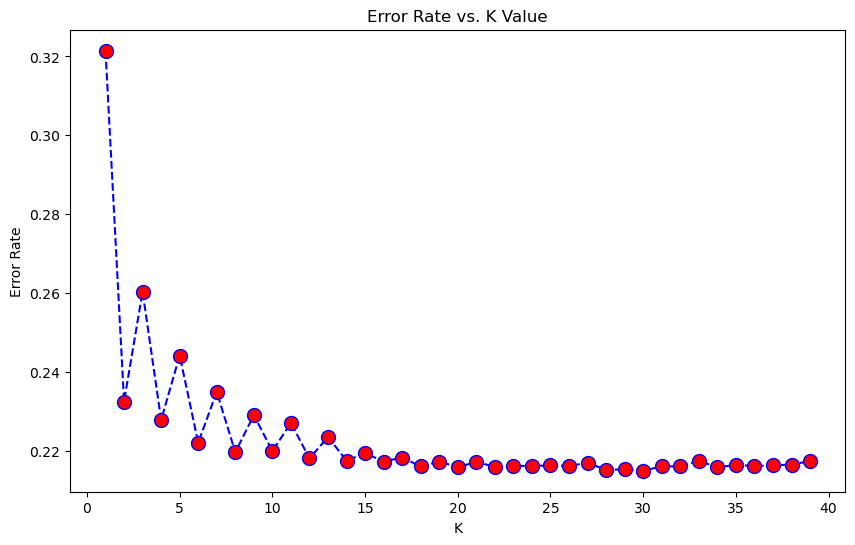

Minimum error:- 0.2148888888888889 at K = 30


In [26]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [27]:
knn = KNeighborsClassifier(n_neighbors=30)

In [28]:
knn.fit(X_train, Y_train)

C:\Users\SRIJITA SARKAR\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=30)

In [29]:
Y_pred2 = knn.predict(X_test)

In [30]:
print ("kNN Classifier...")
print("accuracy: ",accuracy_score(Y_pred2,Y_test), "precision: ", precision_score(Y_pred2,Y_test), "recall: ", recall_score(Y_pred2,Y_test), "F1 score: ", f1_score(Y_pred2,Y_test))

kNN Classifier...
accuracy:  0.7851111111111111 precision:  0.033950617283950615 recall:  0.5409836065573771 F1 score:  0.06389157792836399


# Use the algorithm XG Boost

In [31]:
import xgboost as xgb

In [32]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [33]:
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)
print("accuracy: ",accuracy_score(Y_test, Y_pred_xgb), "precision: ", precision_score(Y_test, Y_pred_xgb), "recall: ", recall_score(Y_test, Y_pred_xgb), "F1 score: ", f1_score(Y_test, Y_pred_xgb))

C:\Users\SRIJITA SARKAR\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:10:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


accuracy:  0.8158888888888889 precision:  0.6227544910179641 recall:  0.37448559670781895 F1 score:  0.4677160295534854


# Comparing the performance of the algorithms¶

# Random Forest Classifier
Accuracy is 0.82 which tells the model correctly predicts the outcomes 82%. This value is good for the model as it is above 70%. 
Precision is 0.63, which is comparatively low as with 63% we can expect a considerable number of variations in our model. 
Recall is 0.37, This is a bad indicator as 63% the model doesn’t correctly identify positive instances (true positives) from all the actual positive samples in the dataset. This can lead to bad decisions. 
F1 Score is 0.47. With the F1 score being an average value, this further affects the performance of the model.

# KNN Classifier
Accuracy is 0.78 which tells the model correctly predicts the outcomes 78%. This value is good for the model as it is above 70%. 
Precision is 0.03, which is comparatively very low indicates that 97% we can expect a considerable number of variations in our model. 
Recall is 0.54, This is a good sign with precision being very low. There is still 46% chance in having False positives. 
F1 Score is 0.06. With the F1 score being very low., this further affects the performance of the model from bad to worse.

# XG Boost
Accuracy is 0.81 which tells the model correctly predicts the outcomes 81%. This value is good for the model as it is above 70%. 
Precision is 0.62, which is a good value as it indicates that 62%, we can expect results with very less variation. 
Recall is 0.37, This is a bad indicator as 63% the model doesn’t correctly identify positive instances (true positives) from all the actual positive samples in the dataset. This can lead to bad decisions. 
F1 Score is 0.46. With the F1 score being an average value, this affects the performance of the model furthermore.

# Overall Interpretation

Accuracy: All models exhibit reasonably good accuracy, with Random Forest slightly edging out the others. This indicates that they can correctly predict a majority of cases.
Precision: Random Forest and XGBoost show comparable precision, suggesting they are better at identifying true positives (correct predictions of the positive class) than KNN. KNN's extremely low precision is a major concern, as it means most of its positive predictions are incorrect.
Recall: KNN has the highest recall, meaning it's better at capturing all actual positive cases. However, its low precision offsets this advantage. Random Forest and XGBoost have similar recall, which is lower than KNN but paired with better precision.
F1-Score: This metric balances precision and recall. Random Forest and XGBoost show similar F1-scores, indicating a reasonable trade-off between precision and recall. KNN's extremely low F1-score confirms its overall poor performance.

Based on the given metrics, Random Forest and XGBoost appear to be the stronger performers. They offer a better balance of precision and recall, leading to more reliable predictions. KNN, despite its relatively good recall, suffers from extremely low precision, making it less suitable for this problem.

In [49]:
new_data = pd.read_excel("C://Users//SRIJITA SARKAR//Downloads//new_credit_data.xlsx")

In [53]:
new_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
5,6,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
6,7,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
7,8,100000,2,2,2,23,0,-1,-1,0,...,601,221,-159,567,380,601,0,581,1687,1542
8,9,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0


In [37]:
new_data.drop(['ID'],axis=1,inplace=True)

In [52]:
new_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [43]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cols=['LIMIT_BAL','AGE','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
new_data[cols]=ss.fit_transform(new_data[cols])

In [44]:
new_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.867810,2,2,1,-1.067755,2,2,-1,-1,-2,...,-0.434572,-0.368574,-0.394807,-0.388105,-0.491585,-0.516014,-0.485450,-0.744297,-0.572794,-0.663218
1,-0.102095,2,2,2,-0.865974,-1,2,0,0,0,...,-0.417933,-0.346390,-0.368316,-0.362668,-0.491585,-0.493625,-0.389829,-0.617658,-0.572794,-0.123596
2,-0.331810,2,2,2,-0.058853,0,0,0,0,0,...,-0.327121,-0.271413,-0.280192,-0.266816,-0.393020,-0.457630,-0.389829,-0.617658,-0.298457,0.685837
3,-0.638096,2,2,1,0.243818,0,0,0,0,0,...,-0.028796,-0.176612,-0.172762,-0.157626,-0.361724,-0.420268,-0.370705,-0.604994,-0.279527,-0.393407
4,-0.638096,1,2,1,2.261622,-1,0,-1,0,0,...,-0.141140,-0.226605,-0.248004,-0.238875,-0.361724,2.075027,0.470756,0.395450,-0.383776,-0.480017


In [45]:
rf.predict(new_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
knn.predict(new_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
xgb_model.predict(new_data)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# From the analysis of the 3 methods, only xgboost has given all the correct predicted values from the data set